# Research stat arbitrage between ETC, LTC in comparison with BTC

In [1]:
import pandas as pd
import statsmodels.api as sm
pd.set_option('display.precision', 10)

import matplotlib.pyplot as plt

/home/vampire/PycharmProjects/mikasa_ed/venv/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_etc = pd.read_csv('../datasets/30min/BTC_ETC.csv', index_col=0)
df_etc.head()

,open,high,low,close
datetime,,,,
1473507000,0.00228397,0.00229631,0.00227533,0.00229055
1473508800,0.00229055,0.00229631,0.00228104,0.00228104
1473510600,0.00228104,0.00230000,0.00228104,0.00228812
1473512400,0.00228850,0.00229397,0.00227278,0.00228395
1473514200,0.00227622,0.00228002,0.00222037,0.00223918


In [3]:
df_ltc = pd.read_csv('../datasets/30min/BTC_LTC.csv', index_col=0)
df_ltc.head()

,open,high,low,close
datetime,,,,
1473507000,0.00639002,0.00640070,0.00639,0.00640028
1473508800,0.00640028,0.00640072,0.00640,0.00640071
1473510600,0.00640000,0.00640769,0.00639,0.00639681
1473512400,0.00639660,0.00640805,0.00639,0.00640805
1473514200,0.00639001,0.00640936,0.00639,0.00639007


In [4]:
df_etc['open'].corr(df_ltc['open'])

0.85712434340441712

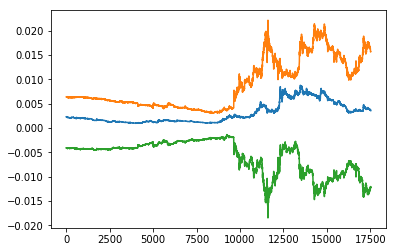

In [5]:
X = df_etc['close'].values
Y = df_ltc['close'].values
Z = X - Y
plt.plot(X)
plt.plot(Y)
plt.plot(Z)
plt.show()

In [6]:
hedge_ratio = sm.OLS(Y, X).fit()

In [7]:
hedge_ratio = hedge_ratio.params[0]

In [8]:
spread = Y - hedge_ratio * X

In [9]:
spread.shape

(17520,)

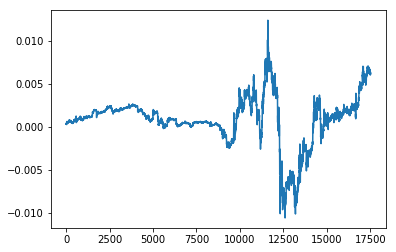

In [10]:
plt.plot(spread)
plt.show()

In [11]:
zscore = ((spread - spread.mean()) / spread.std())

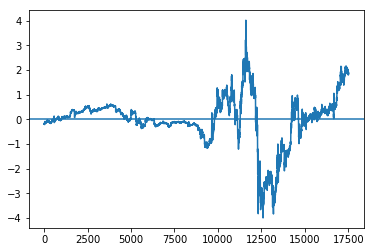

In [12]:
plt.plot(zscore)
plt.axhline(0)
plt.show()